<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [45]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [46]:
x_train.shape

(404, 13)

In [47]:
from sklearn.preprocessing import Normalizer, StandardScaler
transformer = StandardScaler()

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model1 = Sequential()
model1.add(Dense(13, input_dim=13,  activation='relu'))
model1.add(Dense(6,  activation='relu'))
model1.add(Dense(3,  activation='relu'))
model1.add(Dense(1))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
model1.fit(x_train,y_train, epochs=250, verbose=False)

In [51]:
model1.evaluate(x_test,y_test)

102/102 [==============================] - 0s 645us/sample - loss: 20.7879


20.78794501809513

In [52]:
epoch = model1.history.epoch
loss = model1.history.history['loss']

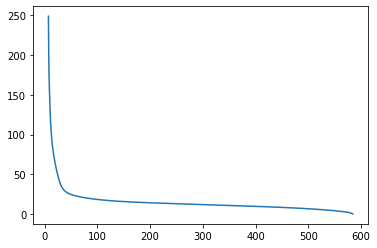

In [53]:
import matplotlib.pyplot as plt

plt.plot(loss, epoch)

plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = lr_model.predict(x_test)

In [14]:
mean_squared_error(y_test, y_pred)

23.19559925642299

With Feature Engineering

In [32]:
import pandas as pd
def wrangle(x):
    df = pd.DataFrame(x)
    df[13] = df[0] * df[11]
    
    return df.to_numpy()

In [33]:
x_train_new = wrangle(x_train)
x_test_new = wrangle (x_test)

In [38]:
model_new = Sequential()
model_new.add(Dense(14, input_dim=14,  activation='relu'))
model_new.add(Dense(7,  activation='relu'))
model_new.add(Dense(3,  activation='relu'))
model_new.add(Dense(1))
# Compile model
model_new.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
model_new.fit(x_train_new,y_train, epochs=250, verbose=False)

In [44]:
model_new.evaluate(x_test_new,y_test)

102/102 [==============================] - 0s 714us/sample - loss: 18.6139


18.613874547621784

In [56]:
lr_model.fit(x_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = lr_model.predict(x_test_new)

In [58]:
mean_squared_error(y_test, y_pred)

23.0057452463353

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [114]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

import numpy as np

In [107]:
# Load the Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [108]:
X_train.shape

(60000, 28, 28)

In [109]:
X_train = X_train / 255
X_test = X_test / 255

In [110]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [104]:
# Correct Encoding on Y

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [127]:
model2 = Sequential([Flatten(input_shape=(28, 28))])

# Input => Hidden
model2.add(Dense(128, input_dim=784, activation='relu'))
# Hidden
model2.add(Dense(64, activation='relu'))
# Hidden
model2.add(Dense(32, activation='relu'))
# Hidden
model2.add(Dense(16, activation='relu'))
# Output
model2.add(Dense(10,activation='softmax'))

#Compile
model2.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_79 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_80 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_______________________________________________

In [128]:
model2.fit(X_train, y_train, epochs=10, verbose=False)

In [129]:
model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.4773 - acc: 0.8890


[0.47728387992531063, 0.889]

In [130]:
epoch = model2.history.epoch
acc = model2.history.history['acc']

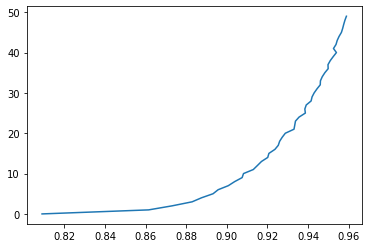

In [131]:
import matplotlib.pyplot as plt

plt.plot(acc, epoch)

plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.